In [26]:
include("operations.jl")

findmax (generic function with 8 methods)

In [31]:
function Rₘₘₛₑ(Y, H, C₀₀, Cᵥᵥ
        , α=0.01 # Learning Rate
        , max_iterations=1000
        , tolerance=1e-6
)
    # Initialize parameters
    θ = zeros(size(C₀₀, 1))
    trajectory = []
    
    for iteration in 1:max_iterations

        # Compute gradient
        ∇J = -(H)ᵀ * (Cᵥᵥ)⁻¹ * (Y - H * θ) + (C₀₀)⁻¹ * θ
        
        # Update parameters
        θ -= α * ∇J

        push!(trajectory, copy(θ))  # Save the current parameter vector

        # Check for convergence
        if norm(∇J) < tolerance
            break
        end
    end
    
    return θ, trajectory
end

Rₘₘₛₑ (generic function with 4 methods)

In [32]:
using LinearAlgebra
using Random

# Set seed for reproducibility
Random.seed!(42)

# Sample data dimensions
n = 100  # Number of observations
m = 3    # Number of parameters

# Generate sample data
H = randn(n, m)
C₀₀ = randn(m, m)
Cᵥᵥ = randn(n, n)
Y = H * randn(m) + randn(n)

# Run the MMSE estimator
estimated_theta_mmse, trajectory_mmse = Rₘₘₛₑ(Y, H, C₀₀, Cᵥᵥ)

# Display the results
println("True Parameter Vector: ", randn(m))
println("Estimated Parameter Vector: ", estimated_theta)

True Parameter Vector: [-1.2764139175879345, -0.7677331574242201, -1.2921496327003292]
Estimated Parameter Vector: [3.6628422206951826e12, 3.7865837108817666e12, -1.7831113894657427e12]


True Parameter Vector: [-1.2764139175879345, -0.7677331574242201, -1.2921496327003292]
Estimated Parameter Vector: [3.6628422206951826e12, 3.7865837108817666e12, -1.7831113894657427e12]

┌ Warning: Skipped marker arg *.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/args.jl:1149


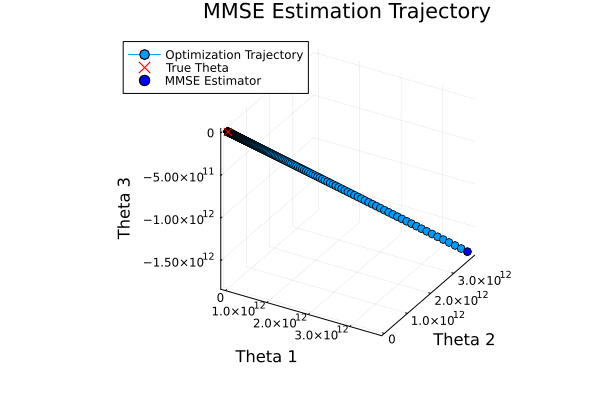

In [33]:
# Plot the optimization trajectory
plot(
    [theta[1] for theta in trajectory_mmse],
    [theta[2] for theta in trajectory_mmse],
    [theta[3] for theta in trajectory_mmse],
    marker = :o,
    label = "Optimization Trajectory",
    xlabel = "Theta 1",
    ylabel = "Theta 2",
    zlabel = "Theta 3",
    title = "MMSE Estimation Trajectory"
)
scatter!([true_theta[1]], [true_theta[2]], [true_theta[3]], marker = :x, label = "True Theta", color = :red)
scatter!([estimated_theta_mmse[1]], [estimated_theta_mmse[2]], [estimated_theta_mmse[3]], marker = :*, label = "MMSE Estimator", color = :blue)

# References
- [ ] [ECE 313: Problem Set 13](https://courses.engr.illinois.edu/ece313/fa2013/homework/SOL13.pdf)
- [ ] [* minimum mean square error linear estimator (Ch 4.9.3)](https://uofi.box.com/s/v1lkb9eo6h1k4vzvlgp9)